# Análise de crédito (German Credit Data)

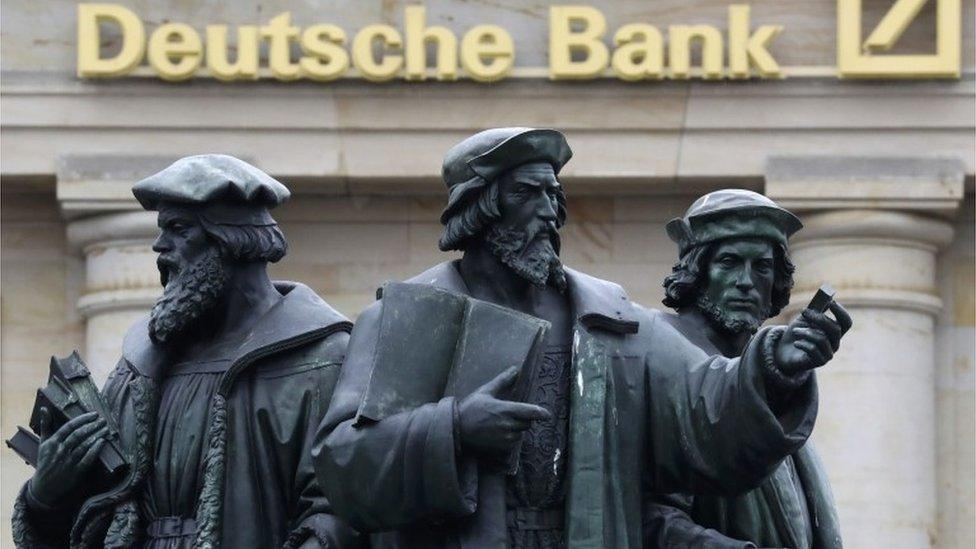

## Obtenção dos dados

Os dados foram coletados a partir do repositório da UCI (https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data).

## Entendendo os dados

Os dados originais foram obtidos por Hans Hofmann, esse dataset possui 1000 observações e 20 atributos. Cada observação representa um indivíduo 
que realizou um empréstimo no banco, e então cada operação é caracterizada como um empréstimo ruim ou bom dada esses atributos.

Abaixo está descrito as features que compõe o dataset original, cada observação é descrita com um código próprio, então para maior interpretabilidade
as dimensões mais importantes serão reescritas conforme as intenções originais.

### Features

**Attribute1** - Status da conta corrente existente  
**Attribute2** - Duração  
**Attribute3** - Histórico de crédito  
**Attribute4** - Motivo do empréstimo  
**Attribute5** - Valor do crédito  
**Attribute6** - Conta poupança/títulos  
**Attribute7** - Tempo de trabalho  
**Attribute8** - Taxa de parcelamento em porcentagem da renda disponível  
**Attribute9** - Status pessoal e sexo  
**Attribute10** - Outros devedores/garantidores  
**Attribute11** - Residência atual  
**Attribute12** - Propriedade  
**Attribute13** - Idade  
**Attribute14** - Outros planos de parcelamento  
**Attribute15** - Habitação  
**Attribute16** - Número de créditos existentes neste banco  
**Attribute17** - Emprego  
**Attribute18** - Número de pessoas responsáveis  
**Attribute19** - Telefone  
**Attribute20** - Trabalhador estrangeiro  

In [1]:
# Instalando o pacote da UCI
!pip install ucimlrepo

In [116]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn import preprocessing
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Modelagem
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

import optuna
FIND_BEST_PARAMS = False
import optuna


import warnings
warnings.filterwarnings("ignore")

In [62]:
# Carregando os dados
statlog_german_credit_data = fetch_ucirepo(id=144)
x = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 

In [3]:
# Os 10 primeiros
x.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [6]:
# Formato do dataset
x.shape

(1000, 20)

O dataset possui 1000 observações e 20 atributos.

In [3]:
# Verificando se há dados inconsistentes
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attribute1   1000 non-null   object
 1   Attribute2   1000 non-null   int64 
 2   Attribute3   1000 non-null   object
 3   Attribute4   1000 non-null   object
 4   Attribute5   1000 non-null   int64 
 5   Attribute6   1000 non-null   object
 6   Attribute7   1000 non-null   object
 7   Attribute8   1000 non-null   int64 
 8   Attribute9   1000 non-null   object
 9   Attribute10  1000 non-null   object
 10  Attribute11  1000 non-null   int64 
 11  Attribute12  1000 non-null   object
 12  Attribute13  1000 non-null   int64 
 13  Attribute14  1000 non-null   object
 14  Attribute15  1000 non-null   object
 15  Attribute16  1000 non-null   int64 
 16  Attribute17  1000 non-null   object
 17  Attribute18  1000 non-null   int64 
 18  Attribute19  1000 non-null   object
 19  Attribute20  1000 non-null  

In [4]:
# Função para determinar a quantidade de valores missing
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

In [5]:
print('-Missing values in X')
display_missing(x)

-Missing values in X
Attribute1 column missing values: 0
Attribute2 column missing values: 0
Attribute3 column missing values: 0
Attribute4 column missing values: 0
Attribute5 column missing values: 0
Attribute6 column missing values: 0
Attribute7 column missing values: 0
Attribute8 column missing values: 0
Attribute9 column missing values: 0
Attribute10 column missing values: 0
Attribute11 column missing values: 0
Attribute12 column missing values: 0
Attribute13 column missing values: 0
Attribute14 column missing values: 0
Attribute15 column missing values: 0
Attribute16 column missing values: 0
Attribute17 column missing values: 0
Attribute18 column missing values: 0
Attribute19 column missing values: 0
Attribute20 column missing values: 0




O dataset não possui nenhum dado NAN.

In [43]:
# Valores unicos
print(x.nunique())

Attribute1       4
Attribute2      33
Attribute3       5
Attribute4      10
Attribute5     921
Attribute6       5
Attribute7       5
Attribute8       4
Attribute9       4
Attribute10      3
Attribute11      4
Attribute12      4
Attribute13     53
Attribute14      3
Attribute15      3
Attribute16      4
Attribute17      4
Attribute18      2
Attribute19      2
Attribute20      2
dtype: int64


### Retrabalhando os dados

Para fins da análise exploratória de dados (EDA), um dataframe espelho contendo os dois conjuntos originais será gerado, tendo algumas da suas observações códigos reescritas para melhor entedimento.

Apesar de ambos datasets não possuirem uma coluna como id, é possivel assumir pela quantidade de linhas que os dois conjuntos de dados
estão ligados pela ordem apresentada, assim, adicionar a coluna target no final de dataframe espelho pode ser adequado.

In [5]:
# Concatenando os dois datasets
vis = pd.concat([x, y], axis = 1)
vis.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


**Variáveis retrabalhadas:**  
    • Variável target  
    • Attribute4 - Motivo do empréstimo  
    • Attribute17 - Emprego atual  
    • Attribute9 - Status pessoal e sexo  
    • Attribute7 - Tempo de trabalho  
    • Attribute15 - Habitação  
    • Attribute19 - telefone  
    • Attribute20 - trabalhador estrangeiro

In [4]:
vis['class'] = vis['class'].replace({1:'Good',
                                     2:'Bad'})

vis['Attribute4'] = vis['Attribute4'].replace({'A40':'Car (new)',
                                               'A41': 'car (used)',
                                               'A42': 'furniture/equipment',
                                               'A43': 'radio/television',
                                               'A44': 'domestic appliances', 
                                               'A45': 'repairs', 
                                               'A46': 'education', 
                                               'A47': 'vacation',
                                               'A48': 'retraining',
                                               'A49': 'business',
                                               'A410': 'others'})

vis['Attribute17'] = vis['Attribute17'].replace({'A171': 'unskilled and non-resident',
                                                 'A172': 'unskilled and resident',
                                                 'A173': 'skilled',
                                                 'A174': 'highly skilled'})

vis['Attribute9'] = vis['Attribute9'].replace({'A91': 'male',
                                               'A92': 'female',
                                               'A93': 'male',
                                               'A94': 'male', 
                                               'A95': 'female'})

vis['Attribute7'] = vis['Attribute7'].replace({'A71': 'unemployed',
                                               'A72': '< 1 year',
                                               'A73': '1-4 years',
                                               'A74': '4-7 years',
                                               'A75': '>= 7 years'})

vis['Attribute15'] = vis['Attribute15'].replace({'A151': 'rent',
                                                 'A152': 'own',
                                                 'A153': 'for free'})

vis['Attribute19'] = vis['Attribute19'].replace({'A191': 'none',
                                                 'A192': 'yes'})

vis['Attribute20'] = vis['Attribute20'].replace({'A201': 'yes',
                                                 'A202': 'no'})

In [37]:
vis.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,radio/television,1169,A65,>= 7 years,4,male,A101,...,A121,67,A143,own,2,skilled,1,A192,A201,Good
1,A12,48,A32,radio/television,5951,A61,1-4 years,2,female,A101,...,A121,22,A143,own,1,skilled,1,A191,A201,Bad
2,A14,12,A34,education,2096,A61,4-7 years,2,male,A101,...,A121,49,A143,own,1,unskilled and resident,2,A191,A201,Good
3,A11,42,A32,furniture/equipment,7882,A61,4-7 years,2,male,A103,...,A122,45,A143,for free,1,skilled,2,A191,A201,Good
4,A11,24,A33,Car (new),4870,A61,1-4 years,3,male,A101,...,A124,53,A143,for free,2,skilled,2,A191,A201,Bad


## Análise exploratória de dados (EDA)

### Análise univariada

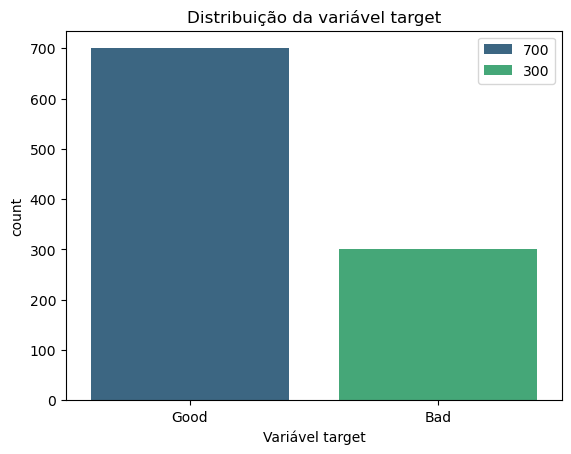

In [5]:
# Distribuição da variável target
ax = sns.countplot(data=vis, x='class',hue='class', palette='viridis', dodge=False)
plt.xlabel('Variável target')
plt.title('Distribuição da variável target')
plt.legend(labels = ['700', '300'])

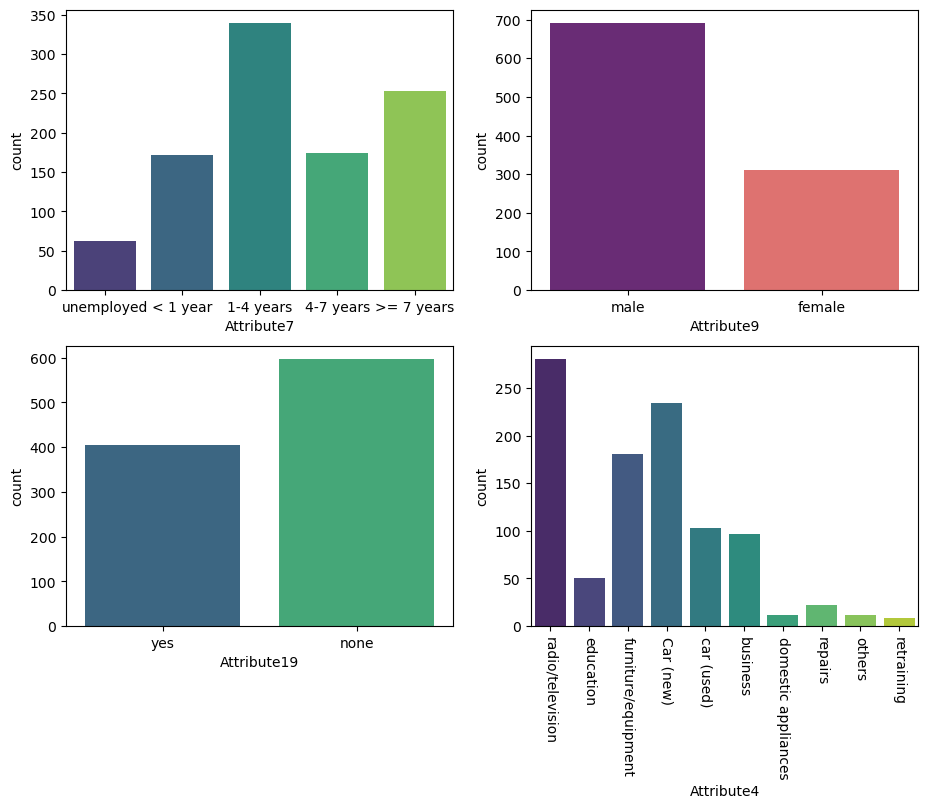

In [38]:
# Distribuição das variáveis categoricas
fig, ax1 = plt.subplots(ncols=2, nrows=2, figsize=[11, 8])
ax = sns.countplot(data=vis, x='Attribute4', palette='viridis', ax=ax1[1,1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=270)
sns.countplot(data=vis, x='Attribute7', order=['unemployed', '< 1 year', '1-4 years', '4-7 years', '>= 7 years'], palette='viridis', ax=ax1[0,0])
sns.countplot(data=vis, x='Attribute9', palette='magma',ax=ax1[0,1])
sns.countplot(data=vis, x='Attribute19', palette='viridis', ax=ax1[1,0])
plt.show()

<Axes: xlabel='Attribute18', ylabel='Count'>

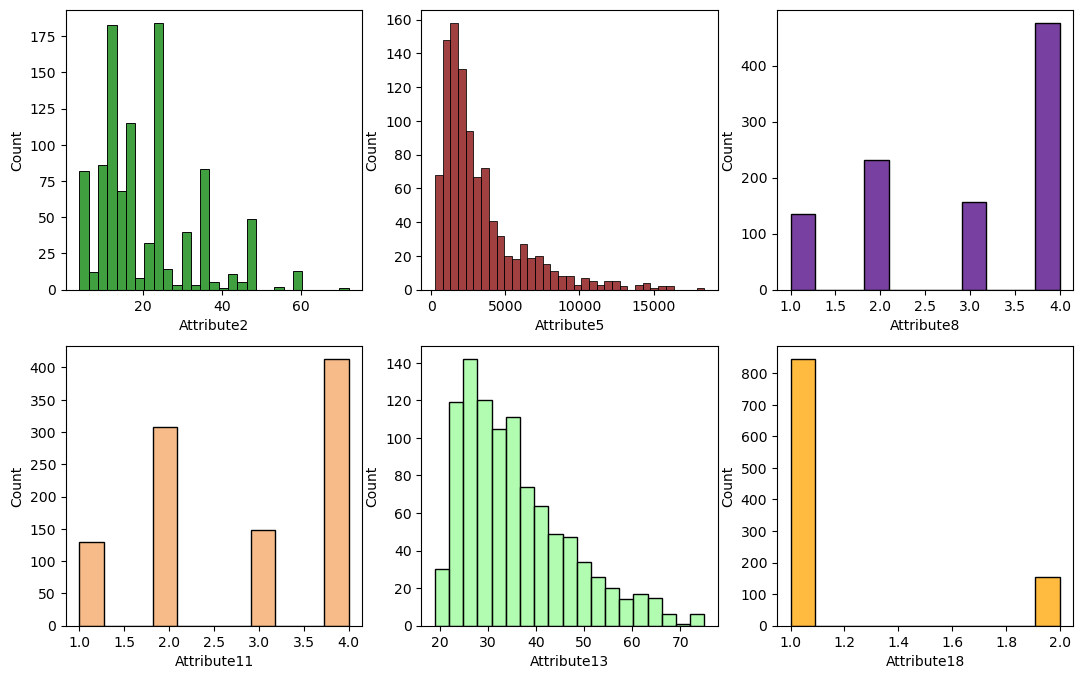

In [46]:
# Distribuição das variáveis numéricas
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=[13, 8])
sns.histplot(data=vis, x='Attribute2', color='green', ax=ax[0,0])
sns.histplot(data=vis, x='Attribute5', color='maroon', ax=ax[0,1])
sns.histplot(data=vis, x='Attribute8', color='indigo', ax=ax[0,2])
sns.histplot(data=vis, x='Attribute11', color='sandybrown',ax=ax[1,0])
sns.histplot(data=vis, x='Attribute13', color='palegreen',ax=ax[1,1])
sns.histplot(data=vis, x='Attribute18', color='orange', ax=ax[1,2])

<Axes: xlabel='Attribute18'>

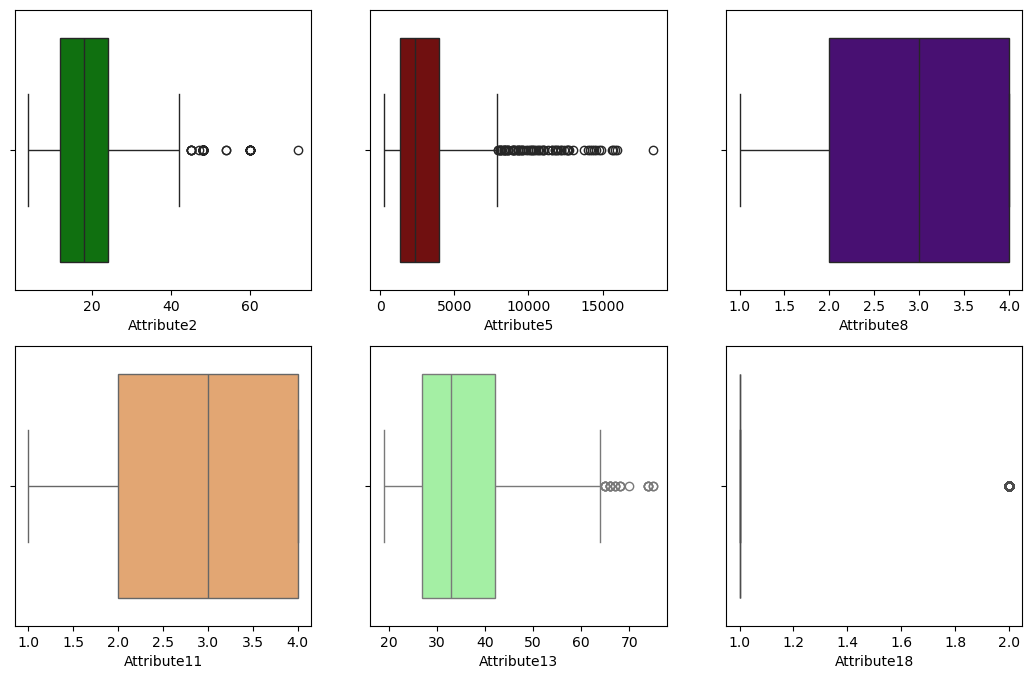

In [6]:
# Boxplots
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=[13, 8])
sns.boxplot(data=vis, x='Attribute2', color='green', ax=ax[0,0])
sns.boxplot(data=vis, x='Attribute5', color='maroon', ax=ax[0,1])
sns.boxplot(data=vis, x='Attribute8', color='indigo', ax=ax[0,2])
sns.boxplot(data=vis, x='Attribute11', color='sandybrown',ax=ax[1,0])
sns.boxplot(data=vis, x='Attribute13', color='palegreen',ax=ax[1,1])
sns.boxplot(data=vis, x='Attribute18', color='orange', ax=ax[1,2])

### Análise Bivariada

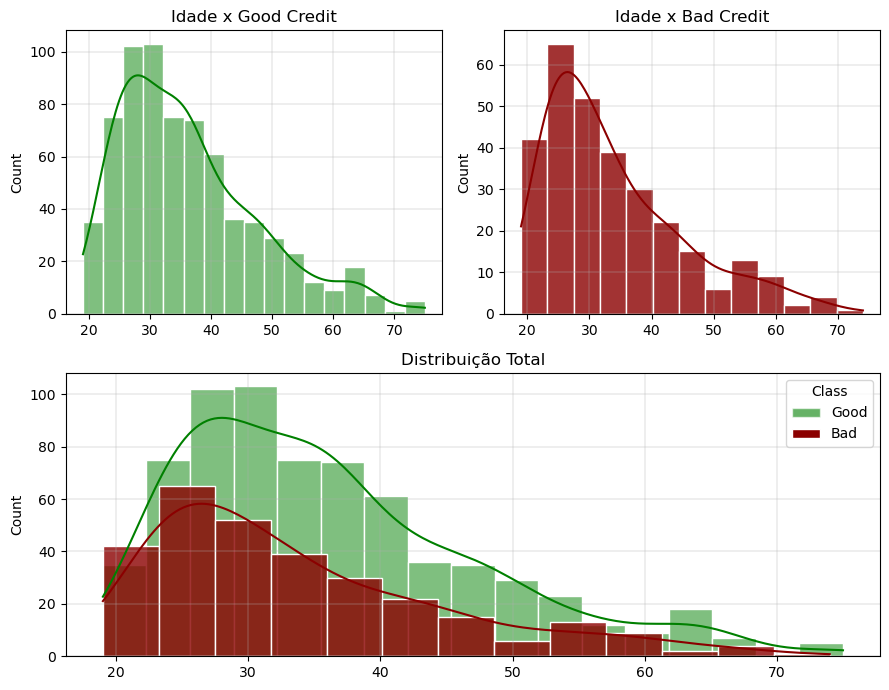

In [10]:
# Criando o layout com GridSpec
fig = plt.figure(figsize=[9, 7])
gs = GridSpec(2, 2, height_ratios=[1, 1])

# Subplots superiores
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Subplot inferior
ax3 = fig.add_subplot(gs[1, :])

# Adicionando os gráficos
sns.histplot(x=vis['Attribute13'].where(vis['class']=='Good'), edgecolor='white', color='green', kde=True, ax=ax1, label='Good').set(xlabel=None)
ax1.set_title('Idade x Good Credit')
ax1.grid(True, which='major', linewidth=0.3)
ax2.grid(True, which='major', linewidth=0.3)
sns.histplot(x=vis['Attribute13'].where(vis['class']=='Bad'), edgecolor='white', color='darkred',alpha=0.8, kde=True, ax=ax2, label='Bad').set(xlabel=None)
ax2.set_title('Idade x Bad Credit')
sns.histplot(x=vis['Attribute13'].where(vis['class']=='Good'), edgecolor='white', color='green', kde=True, ax=ax3).set(xlabel=None)
sns.histplot(x=vis['Attribute13'].where(vis['class']=='Bad'), edgecolor='white', color='darkred', alpha=0.8, kde=True,ax=ax3).set(xlabel=None)
ax3.set_title('Distribuição Total')
ax3.grid(True, which='major', linewidth=0.3)

# Ajustando a legenda
handles = [
    Patch(facecolor='green', alpha=0.6, edgecolor='white', label='Good'),
    Patch(facecolor='darkred', edgecolor='white', label='Bad')
]

# Legenda no terceiro subplot
ax3.legend(handles=handles, title="Class", loc='upper right')

plt.tight_layout()
plt.show()

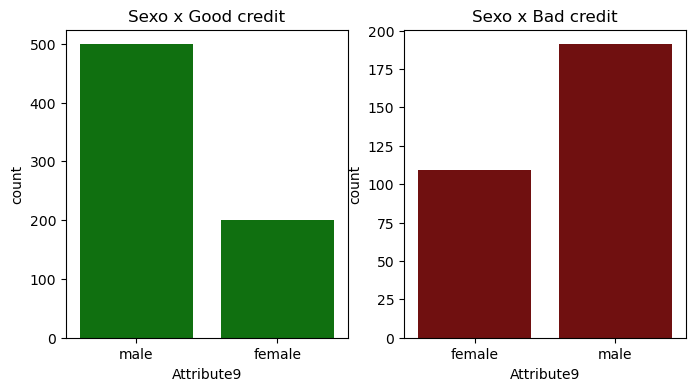

In [11]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=[8, 4])
sns.countplot(x=vis['Attribute9'].where(vis['class']=='Good'), color='green', ax=ax[0])
sns.countplot(x=vis['Attribute9'].where(vis['class']=='Bad'), color='maroon', ax=ax[1])
ax[0].set_title('Sexo x Good credit')
ax[1].set_title('Sexo x Bad credit')
plt.show()

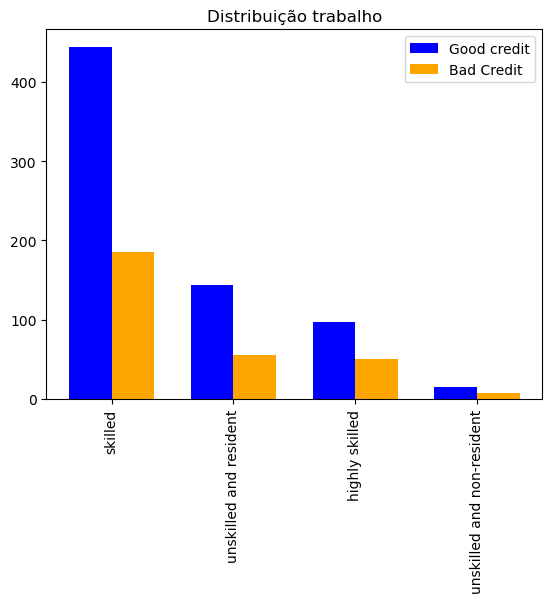

In [109]:
# Distribuição trabalho
# Criando o gráfico
plt.bar(np.arange(len(vis['Attribute17'].unique().tolist())) - 0.35/2, vis['Attribute17'].where(vis['class'] == 'Good').value_counts(), width=0.35, label='Good credit', color='blue')
plt.bar(np.arange(len(vis['Attribute17'].unique().tolist())) + 0.35/2, vis['Attribute17'].where(vis['class'] == 'Bad').value_counts(), width=0.35, label='Bad Credit', color='orange')

# Configurações do gráfico
plt.title('Distribuição trabalho')
plt.xticks(np.arange(len(vis['Attribute17'].unique().tolist())),vis['Attribute17'].unique().tolist(), rotation=90)
plt.legend()

# Exibindo o gráfico
plt.show()


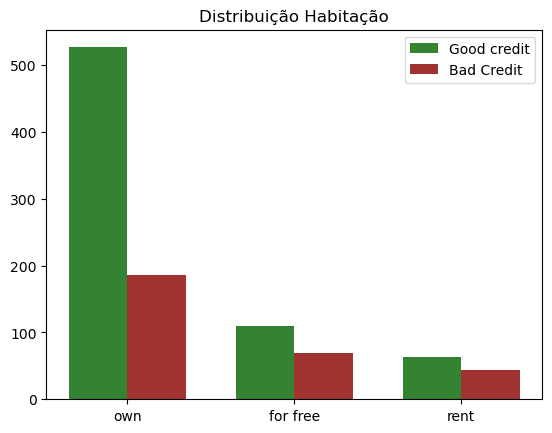

In [18]:
# Distribuição habitação
plt.bar(np.arange(len(vis['Attribute15'].unique().tolist())) - 0.35/2, vis['Attribute15'].where(vis['class'] == 'Good').value_counts(), width=0.35, label='Good credit', color='darkgreen', alpha=0.8)
plt.bar(np.arange(len(vis['Attribute15'].unique().tolist())) + 0.35/2, vis['Attribute15'].where(vis['class'] == 'Bad').value_counts(), width=0.35, label='Bad Credit', color='darkred', alpha=0.8)

plt.title('Distribuição Habitação')
plt.xticks(np.arange(len(vis['Attribute15'].unique().tolist())),vis['Attribute15'].unique().tolist())
plt.legend()
plt.show()

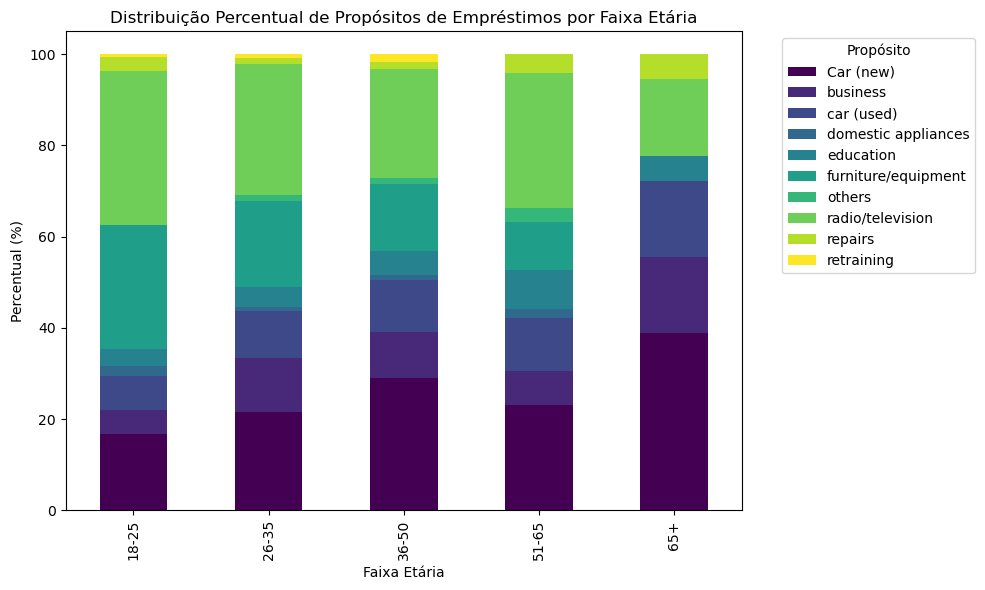

In [7]:
vis['faixa_etaria'] = pd.cut(vis['Attribute13'], bins=[18, 25, 35, 50, 65, 100], 
                             labels=['18-25', '26-35', '36-50', '51-65', '65+'])
faixa_prop = vis.groupby(['faixa_etaria', 'Attribute4']).size().unstack()

faixa_prop_percent = faixa_prop.div(faixa_prop.sum(axis=1), axis=0) * 100

faixa_prop_percent.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
plt.title('Distribuição Percentual de Propósitos de Empréstimos por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual (%)')
plt.legend(title='Propósito', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

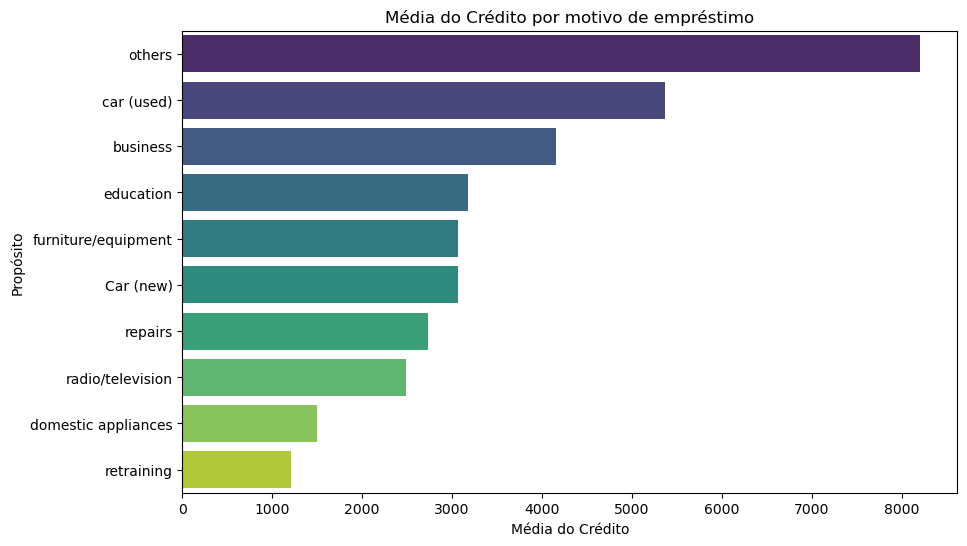

In [14]:
grouped = vis.groupby('Attribute4')['Attribute5'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped.values, y=grouped.index, palette='viridis')
plt.xlabel('Média do Crédito')
plt.ylabel('Propósito')
plt.title('Média do Crédito por motivo de empréstimo')
plt.show()

Para utilizar o mapa de calor é necessário converter as variáveis categóricas em numéricas.

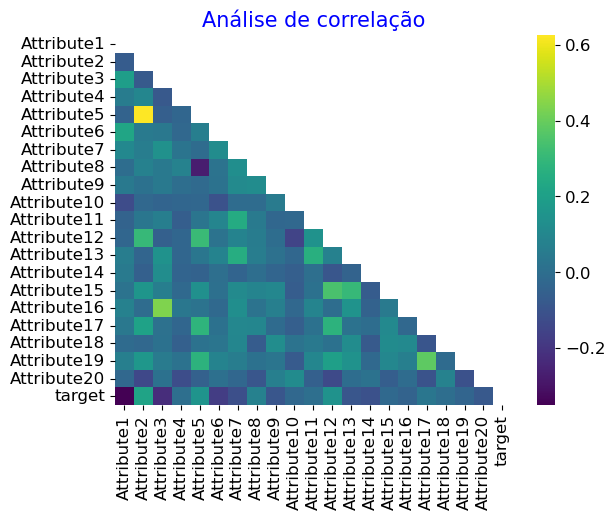

In [32]:
# Criando uma cópia temporária de x com y
x_temp = x.copy()
x_temp['target'] = y 

# Convertendo para numérica
label_encoder = preprocessing.LabelEncoder()
for i in x_temp.select_dtypes(include='object').columns:
    x_temp[i] = label_encoder.fit_transform(x_temp[i])

# Heatmap
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
corr = x_temp.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(dpi=100)
plt.title('Análise de correlação', fontsize=15, color='Blue')
sns.heatmap(corr, mask=mask, lw=0, linecolor='white', cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Pré-processamento

Antes de aplicarmos os algoritmos de machine learning, é necessário que os dados sejam devidamente tratados. Isso inclui a codificação com o LabelEncoder, a normalização com StandardScaler e o tratamento do desbalanceamento de classe presente neste dataframe com Oversampling.

In [63]:
x.select_dtypes(include='object').describe()

,Attribute1,Attribute3,Attribute4,Attribute6,Attribute7,Attribute9,Attribute10,Attribute12,Attribute14,Attribute15,Attribute17,Attribute19,Attribute20
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


As colunas do tipo numérica também precisar ser convertidas para valores normalizados.

In [64]:
scaler = StandardScaler()
colunas_numericas = x.select_dtypes(include=['number']).columns
x[colunas_numericas] = scaler.fit_transform(x[colunas_numericas])
x.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,-1.236478,A34,A43,-0.745131,A65,A75,0.918477,A93,A101,1.046987,A121,2.766456,A143,A152,1.027079,A173,-0.428290,A192,A201
1,A12,2.248194,A32,A43,0.949817,A61,A73,-0.870183,A92,A101,-0.765977,A121,-1.191404,A143,A152,-0.704926,A173,-0.428290,A191,A201
2,A14,-0.738668,A34,A46,-0.416562,A61,A74,-0.870183,A93,A101,0.140505,A121,1.183312,A143,A152,-0.704926,A172,2.334869,A191,A201
3,A11,1.750384,A32,A42,1.634247,A61,A74,-0.870183,A93,A103,1.046987,A122,0.831502,A143,A153,-0.704926,A173,2.334869,A191,A201
4,A11,0.256953,A33,A40,0.566664,A61,A73,0.024147,A93,A101,1.046987,A124,1.535122,A143,A153,1.027079,A173,2.334869,A191,A201


As colunas categóricas precisam ser convertidas para o tipo numérico, vamos utilizar o label encoder.

In [65]:
label_encoder = preprocessing.LabelEncoder()
for i in x.select_dtypes(include='object').columns:
    x[i] = label_encoder.fit_transform(x[i])
x.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,0,-1.236478,4,4,-0.745131,4,4,0.918477,2,0,1.046987,0,2.766456,2,1,1.027079,2,-0.428290,1,0
1,1,2.248194,2,4,0.949817,0,2,-0.870183,1,0,-0.765977,0,-1.191404,2,1,-0.704926,2,-0.428290,0,0
2,3,-0.738668,4,7,-0.416562,0,3,-0.870183,2,0,0.140505,0,1.183312,2,1,-0.704926,1,2.334869,0,0
3,0,1.750384,2,3,1.634247,0,3,-0.870183,2,2,1.046987,1,0.831502,2,2,-0.704926,2,2.334869,0,0
4,0,0.256953,3,0,0.566664,0,2,0.024147,2,0,1.046987,3,1.535122,2,2,1.027079,2,2.334869,0,0


In [66]:
# Transformando a variavel y em 0 e 1
y['class'] = y['class'].map({1:0, 2:1})

## Modelagem preditiva

#### **Definindo o problema**

Queremos avaliar se um determinado indivíduo é 'bom' ou 'mal' pagador, com a variável alvo que classifica em 'bom risco de crédito' ou 'mal risco de crédito', tendo 20 variáveis (numeradas de 1 a 20 no conjunto original), com uma combinação de variáveis categóricas e numéricas. 

Utilizaremos três algoritmos de classificação:  
* XGBoost
* CatBoost
* Random Forest

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.3)

### XGBoost Tuning

In [126]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 0.001, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 10.0)
    }

    # Criando e treinando o XGBClassifier
    xgb_model = XGBClassifier(**params)

    # Avaliação usando validação cruzada
    score = cross_val_score(xgb_model, x_train, y_train, cv=10, scoring='accuracy')
    # Retornando a média dos scores
    return np.mean(score)

# Criando o estudo e otimizando
study1 = optuna.create_study(direction='maximize')
study1.optimize(objective, n_trials=30)

[I 2025-02-03 18:35:47,688] A new study created in memory with name: no-name-c1a9e6b8-a39d-4d77-b187-2fad22c06b8a
[I 2025-02-03 18:35:50,303] Trial 0 finished with value: 0.7457142857142858 and parameters: {'n_estimators': 800, 'max_depth': 4, 'learning_rate': 0.017070163697124555, 'subsample': 0.5049646710577966, 'colsample_bytree': 0.8697688820081986, 'gamma': 0.2799893939622652, 'reg_alpha': 0.09078287464374242, 'reg_lambda': 1.0058296215663451}. Best is trial 0 with value: 0.7457142857142858.
[I 2025-02-03 18:35:52,767] Trial 1 finished with value: 0.6957142857142857 and parameters: {'n_estimators': 800, 'max_depth': 8, 'learning_rate': 0.002531125910022052, 'subsample': 0.689188880043498, 'colsample_bytree': 0.5967339721346856, 'gamma': 0.5547535140234205, 'reg_alpha': 9.621763039404117, 'reg_lambda': 0.14161335868598704}. Best is trial 0 with value: 0.7457142857142858.
[I 2025-02-03 18:35:54,422] Trial 2 finished with value: 0.7114285714285715 and parameters: {'n_estimators': 600

In [99]:
print('Melhores hiperparâmetros:', study1.best_params)
print('Melhor acuracia:', study1.best_value)

Melhores hiperparâmetros: {'iterations': 1000, 'depth': 4, 'learning_rate': 0.017239093376228243, 'l2_leaf_reg': 1.6881577725136159, 'bagging_temperature': 0.9113142637010786, 'random_strength': 0.2820715897158847, 'border_count': 197, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 3}
Melhor acuracia: 0.7585714285714286


### CatBoost Tuning

In [98]:
def objective(trial):
    params = {
        'verbose': False,
        'iterations': trial.suggest_int('iterations', 100, 1000, step=100),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
        'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_uniform('random_strength', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 20)}
        
    # Criando e treinando o catboostClassifier   
    cat_model = CatBoostClassifier(**params)

    # Avaliação usando validação cruzada
    score = cross_val_score(cat_model, x_train, y_train, cv=10, scoring='accuracy')

    # Retornando a média dos scores
    return np.mean(score)

# Criando o estudo e otimizando
study2 = optuna.create_study(direction='maximize')
study2.optimize(objective, n_trials=30)

[I 2025-02-03 18:03:56,796] A new study created in memory with name: no-name-c393d761-8782-4774-8fff-614ad813635e
[I 2025-02-03 18:04:39,615] Trial 0 finished with value: 0.7428571428571428 and parameters: {'iterations': 1000, 'depth': 10, 'learning_rate': 0.00841169431987461, 'l2_leaf_reg': 1.4571008550941953, 'bagging_temperature': 0.822244008696367, 'random_strength': 0.6970540548036244, 'border_count': 139, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 8}. Best is trial 0 with value: 0.7428571428571428.
[I 2025-02-03 18:05:01,092] Trial 1 finished with value: 0.74 and parameters: {'iterations': 800, 'depth': 9, 'learning_rate': 0.044733988217734104, 'l2_leaf_reg': 0.24678616015491245, 'bagging_temperature': 0.8513722228623098, 'random_strength': 0.7715367431173535, 'border_count': 53, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 14}. Best is trial 0 with value: 0.7428571428571428.
[I 2025-02-03 18:05:07,979] Trial 2 finished with value: 0.7442857142857143 and parameters: {'ite

In [100]:
print('Melhores hiperparâmetros:', study2.best_params)
print('Melhor acuracia:', study2.best_value)

Melhores hiperparâmetros: {'iterations': 100, 'depth': 5, 'learning_rate': 0.057760138862657066, 'l2_leaf_reg': 0.48374777478479675, 'bagging_temperature': 0.0018875852905940183, 'random_strength': 0.8425520906935005, 'border_count': 171, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 16}
Melhor acuracia: 0.7528571428571429


### Random Forest Tuning

In [123]:
def objective(trial):
    # Definir os hiperparâmetros a serem otimizados
    params = {
        'random_state': 42,
        'n_jobs': -1,
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),  # Número de árvores
        'max_depth': trial.suggest_int('max_depth', 3, 20),  # Profundidade máxima das árvores
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),  # Minimo de amostras para dividir um nó
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)  # Mínimo de amostras por folha
    }


    # Criando e treinando o Random Forest  
    rn_model = RandomForestClassifier(**params)

    # Avaliação usando validação cruzada
    score = cross_val_score(rn_model, x_train, y_train, cv=10, scoring='accuracy')

    # Retornando a média dos scores
    return np.mean(score)

# Criando o estudo e otimizando
study3 = optuna.create_study(direction='maximize')
study3.optimize(objective, n_trials=30)

[I 2025-02-03 18:34:41,424] A new study created in memory with name: no-name-fefb020a-6608-41a0-88d9-57603d7d9f85
[I 2025-02-03 18:34:43,243] Trial 0 finished with value: 0.7514285714285714 and parameters: {'n_estimators': 75, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7514285714285714.
[I 2025-02-03 18:34:44,676] Trial 1 finished with value: 0.7328571428571429 and parameters: {'n_estimators': 82, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.7514285714285714.
[I 2025-02-03 18:34:45,707] Trial 2 finished with value: 0.7357142857142857 and parameters: {'n_estimators': 56, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7514285714285714.
[I 2025-02-03 18:34:46,874] Trial 3 finished with value: 0.6985714285714286 and parameters: {'n_estimators': 65, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7

In [124]:
print('Melhores hiperparâmetros:', study3.best_params)
print('Melhor acuracia:', study3.best_value)

Melhores hiperparâmetros: {'n_estimators': 76, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 1}
Melhor acuracia: 0.7585714285714286


In [134]:
variaveis = ['XGBoost', 'CatBoost', 'Random Forest']
valores = [study1.best_value, study2.best_value, study3.best_value]
df = pd.DataFrame({
    'Variável': variaveis,
    'Valor': valores
})
print(df.groupby('Variável')['Valor'].apply(lambda x: x.sort_values()))

Variável        
CatBoost       1    0.752857
Random Forest  2    0.758571
XGBoost        0    0.750000
Name: Valor, dtype: float64
